# Pydy Tuesday 29-07-2025 - Netflix Viewing Data

### 1. Import Libraries

In [1]:
import sys
import pydytuesday
import pandas as pd

# For Data Visualisation
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print("Python:", sys.version)
print("pandas:", pd.__version__)
print("matplotlib:", matplotlib.__version__)
print("seaborn:", sns.__version__)

Python: 3.12.3 (tags/v3.12.3:f6650f9, Apr  9 2024, 14:05:25) [MSC v.1938 64 bit (AMD64)]
pandas: 2.3.0
matplotlib: 3.6.2
seaborn: 0.13.2


### 2.a. Load Data from the official pydytuesday repo

In [3]:
# Use date to fetch the files for that week
pydytuesday.get_date('2025-07-29')

Trying to fetch README from: https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/main/data/2025/2025-07-29/readme.md
Successfully fetched README from: https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/main/data/2025/2025-07-29/readme.md
Successfully saved NFLX_H12025_EngagementReport_Top10Shows.png to d:\SAUVIK\Projects\Pydy_Tuesdays\Pydy_29072025\NFLX_H12025_EngagementReport_Top10Shows.png
Successfully saved meta.yaml to d:\SAUVIK\Projects\Pydy_Tuesdays\Pydy_29072025\meta.yaml
Successfully saved movies.csv to d:\SAUVIK\Projects\Pydy_Tuesdays\Pydy_29072025\movies.csv
Successfully saved shows.csv to d:\SAUVIK\Projects\Pydy_Tuesdays\Pydy_29072025\shows.csv


### 2.b. Load data into dataframe using Pandas and do initial exploration

In [4]:
# Load datasets using Pandas 
movies = pd.read_csv('movies.csv')
shows = pd.read_csv('shows.csv')

# Store all the files in a dictionary
datafiles = {
    "movies": movies,
    "shows": shows
}

# Print info for all the files
for filename, df in datafiles.items():
    print(f" {filename} Info: \n")
    print(df.info())
    print("\n" + "-"*60 + "\n")

 movies Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36121 entries, 0 to 36120
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   source              36121 non-null  object 
 1   report              36121 non-null  object 
 2   title               36115 non-null  object 
 3   available_globally  36112 non-null  object 
 4   release_date        6725 non-null   object 
 5   hours_viewed        36109 non-null  float64
 6   runtime             36109 non-null  object 
 7   views               36109 non-null  float64
dtypes: float64(2), object(6)
memory usage: 2.2+ MB
None

------------------------------------------------------------

 shows Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27803 entries, 0 to 27802
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   source              27803 non-null  obje

In [ ]:
# Set option to view data in single line
pd.set_option('display.width', 1000)

# See statistical info of all features (including categorical features) of 'movies' dataframe
print(movies.describe(include='all'))

                                                   source       report    title available_globally release_date  hours_viewed    runtime         views
count                                               36121        36121    36115              36112         6725  3.610900e+04      36109  3.610900e+04
unique                                                  4            4    13551                  3         1128           NaN        212           NaN
top     4_What_We_Watched_A_Netflix_Engagement_Report_...  2023Jul-Dec  Monster                 No   2020-06-19           NaN  1H 40M 0S           NaN
freq                                                 9399         9399        7              29235           24           NaN       1021           NaN
mean                                                  NaN          NaN      NaN                NaN          NaN  2.790858e+06        NaN  1.573256e+06
std                                                   NaN          NaN      NaN               

In [ ]:
# See statistical info of the 'shows' dataframe
print(shows.describe(include='all'))

                                                   source       report                   title available_globally release_date  hours_viewed    runtime         views
count                                               27803        27803                   27797              27794        13770  2.779100e+04      27089  2.779100e+04
unique                                                  4            4                    9913                  3         1968           NaN       1519           NaN
top     1_What_We_Watched_A_Netflix_Engagement_Report_...  2025Jan-Jun  You vs. Wild: Season 1                 No   2025-01-01           NaN  4H 44M 0S           NaN
freq                                                 7508         7508                       5              16702           65           NaN        351           NaN
mean                                                  NaN          NaN                     NaN                NaN          NaN  9.807243e+06        NaN  1.414994e+06
std 

In [10]:
# See data samples from both dataframes
print("\n movies sample rows:\n", movies.head())
print("\n shows sample rows:\n", shows.head())


 movies sample rows:
                                               source       report           title available_globally release_date  hours_viewed    runtime        views
0  1_What_We_Watched_A_Netflix_Engagement_Report_...  2025Jan-Jun  Back in Action                Yes   2025-01-17   313000000.0  1H 54M 0S  164700000.0
1  1_What_We_Watched_A_Netflix_Engagement_Report_...  2025Jan-Jun           STRAW                Yes   2025-06-06   185200000.0  1H 48M 0S  102900000.0
2  1_What_We_Watched_A_Netflix_Engagement_Report_...  2025Jan-Jun   The Life List                Yes   2025-03-28   198900000.0   2H 5M 0S   95500000.0
3  1_What_We_Watched_A_Netflix_Engagement_Report_...  2025Jan-Jun   Exterritorial                Yes   2025-04-30   159000000.0  1H 49M 0S   87500000.0
4  1_What_We_Watched_A_Netflix_Engagement_Report_...  2025Jan-Jun           Havoc                Yes   2025-04-25   154900000.0  1H 47M 0S   86900000.0

 shows sample rows:
                                            

In [ ]:
# Check for nulls in movies df
movies.isnull().sum()

source                    0
report                    0
title                     6
available_globally        9
release_date          29396
hours_viewed             12
runtime                  12
views                    12
dtype: int64

In [ ]:
# Check nulls in shows df
shows.isnull().sum()

source                    0
report                    0
title                     6
available_globally        9
release_date          14033
hours_viewed             12
runtime                 714
views                    12
dtype: int64

Observation:   'release_date' has a high proportion : over 80% nulls in 'movies' dataframe and over 50% nulls in the 'shows' dataframe. 


In [ ]:
# Check for duplicates
dup_key = movies.duplicated(subset=['title', 'runtime', 'views'])
print("Duplicates by title:", dup_key.sum())
print(movies[dup_key].head())

Duplicates by title: 8520
                                                 source       report                      title available_globally release_date  hours_viewed    runtime       views
8676  2_What_We_Watched_A_Netflix_Engagement_Report_...  2024Jul-Dec                        NaN                NaN          NaN           NaN        NaN         NaN
8821  2_What_We_Watched_A_Netflix_Engagement_Report_...  2024Jul-Dec               The Gray Man                Yes   2022-07-22    34400000.0   2H 9M 0S  16000000.0
8964  2_What_We_Watched_A_Netflix_Engagement_Report_...  2024Jul-Dec           The Adam Project                Yes   2022-03-11    18100000.0  1H 47M 0S  10100000.0
9177  2_What_We_Watched_A_Netflix_Engagement_Report_...  2024Jul-Dec  Back to the Future (1985)                 No          NaN    12500000.0  1H 56M 0S   6500000.0
9270  2_What_We_Watched_A_Netflix_Engagement_Report_...  2024Jul-Dec         Your Place or Mine                Yes   2023-02-10    10300000.0  1H 51M

Observation:  It seems that most movie names appear in all the sources and report periods, which implies that a movie that has released early appears in all the subsequent reports provided they are not removed from the Netflix platform.

### Check how many unique sources are there, which corresponds to the half yearly time durations, e.g. Jul-Dec 2023.

In [ ]:
# Check unique values of 'source'
movies['source'].unique()

array(['1_What_We_Watched_A_Netflix_Engagement_Report_2025Jan-Jun',
       '2_What_We_Watched_A_Netflix_Engagement_Report_2024Jul-Dec',
       '3_What_We_Watched_A_Netflix_Engagement_Report_2024Jan-Jun',
       '4_What_We_Watched_A_Netflix_Engagement_Report_2023Jul-Dec'],
      dtype=object)

In [ ]:
print(movies['source'].value_counts().sort_index())

source
1_What_We_Watched_A_Netflix_Engagement_Report_2025Jan-Jun    8674
2_What_We_Watched_A_Netflix_Engagement_Report_2024Jul-Dec    8684
3_What_We_Watched_A_Netflix_Engagement_Report_2024Jan-Jun    9364
4_What_We_Watched_A_Netflix_Engagement_Report_2023Jul-Dec    9399
Name: count, dtype: int64


Observation: There are 4 periods:-  
1. Jul-Dec 2023
2. Jan-Jun 2024
3. Jul-Dec 2024
4. Jan-Jun 2025   

However the count in Jul-Dec 2023 is greater than that of the latest period, i.e. Jan-Jun 2025, which implies there are movies that have been removed from the platform.

In [ ]:
# Join the movies and shows into a single dataframe with an additional field 'type' to indicate whether it is a movie or a show.
movies['type'] = 'Movie'
shows['type'] = 'Show'
df = pd.concat([movies, shows], ignore_index=True)

### 3. Exploratory Data Analysis

### 3.1. Count of movies and shows by their global availability

Text(0.5, 1.0, 'Global Availability')

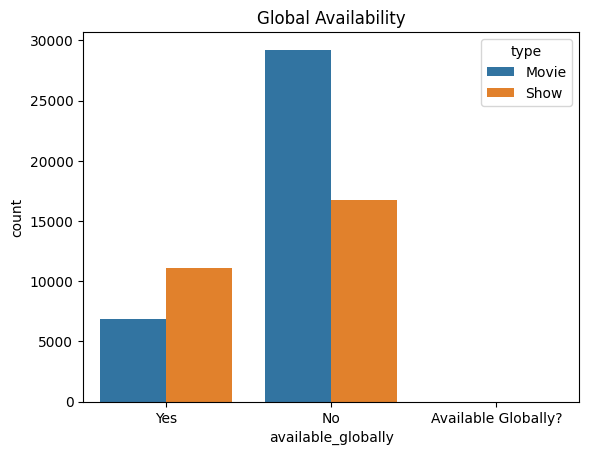

In [34]:
sns.countplot(data=df, x='available_globally', hue='type')
plt.title("Global Availability")

Observation:  
- Overall there are more number of movies and shows which are not available globally.
- The gap in case of movies is far greater than that of shows, which means more number of shows are available to watch globally, as compared to movies.

### 3.2 Top Netflix movies and shows according to viewings and whether they were available globally or not, over 2 years.

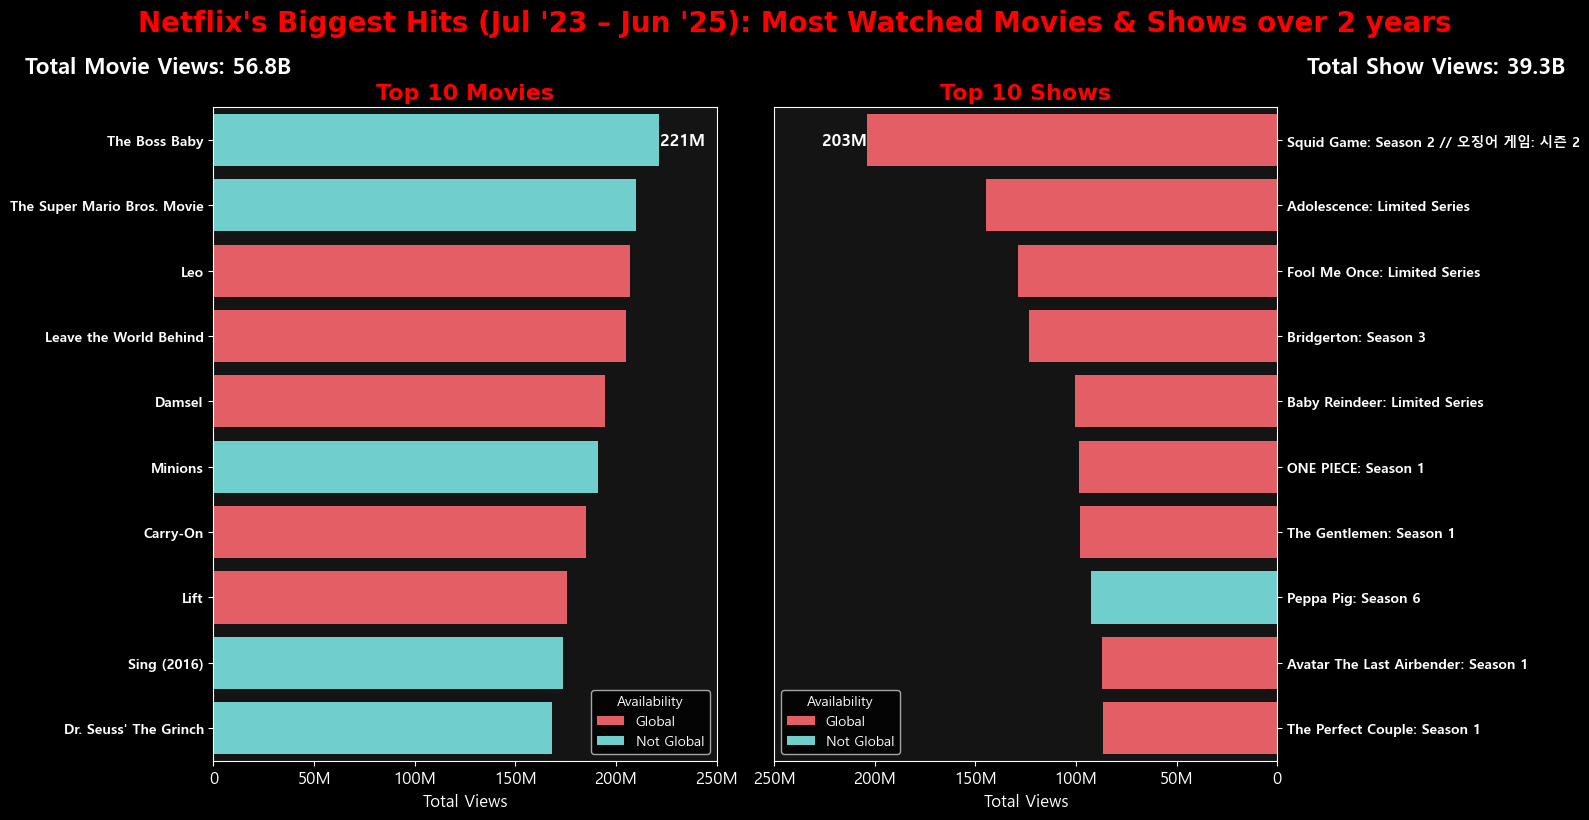

In [ ]:
# Format number to show appropriate numeric labels in terms of M(for million) or B(for billion)
def format_number(x):
    if x >= 1e9:
        return f"{x/1e9:.1f}B"
    elif x >= 1e6:
        return f"{int(x/1e6)}M"
    else:
        return f"{int(x)}"


group_cols = ['title', 'runtime', 'type', 'global']
df_agg = df.groupby(group_cols, dropna=False)[['views']].sum().reset_index()

# Create label for plotting
df_agg['label'] = df_agg['title']   

# Get top 10 movies & top 10 shows
top_movies = df_agg[df_agg['type'] == 'Movie'].nlargest(10, 'views').copy()
top_movies = top_movies.sort_values('views', ascending=False)  

top_shows = df_agg[df_agg['type'] == 'Show'].nlargest(10, 'views').copy()
top_shows = top_shows.sort_values('views', ascending=False)

# Set plot background to dark and set colour palette to get a feel of Netflix aesthetics (Black-Red Combo)
plt.style.use('dark_background')
netflix_palette = {
    'Global': "#FA4851",
    'Not Global': "#60DEDC"
}

# Create 2 subplots - 1 for movies and 1 for shows
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharex=False)
plt.subplots_adjust(wspace=0.5)

# Common title for the figure 
fig.suptitle("Netflix's Biggest Hits (Jul '23 – Jun '25): Most Watched Movies & Shows over 2 years", font='DejaVu Sans', fontsize=20, y=1.02, weight='bold', color='Red')

# Plot movies
sns.barplot(
    data=top_movies,
    x='views',
    y='label',
    hue='global',
    hue_order=['Global', 'Not Global'],
    palette=netflix_palette,
    ax=axes[0]
)

# Set subplot specifications
axes[0].set_title("Top 10 Movies", font='DejaVu Sans', fontsize=16, weight='bold', color='Red')
axes[0].set_xlabel("Total Views", size=12)
axes[0].set_ylabel("")
xticks = axes[0].get_xticks()
axes[0].set_xticks(xticks)
axes[0].set_xticklabels([format_number(x) for x in axes[0].get_xticks()], size=12)

# Annotate top movie
top_movie_row = top_movies.iloc[0]
axes[0].text(
    top_movie_row['views'] + 500000,  # a bit to the right of the bar
    0,  # first bar is at y=0
    format_number(top_movie_row['views']),
    va='center',
    fontsize=12,
    fontweight='bold',
    color='white'
)

# Plot shows
sns.barplot(
    data=top_shows,
    x='views',
    y='label',
    hue='global',
    hue_order=['Global', 'Not Global'],
    palette=netflix_palette,
    ax=axes[1]
)

# Set subplot specifications
axes[1].set_title("Top 10 Shows", font='DejaVu Sans', fontsize=16, weight='bold', color='Red')
axes[1].invert_xaxis()                             # Invert x-axis
axes[1].yaxis.tick_right()                         # Move y-ticks to the right
axes[1].yaxis.set_label_position("right")  
axes[1].set_xlabel("Total Views", size=12)
axes[1].set_ylabel("")
ticks = list(range(0, 250_000_001, 50_000_000)) 
axes[1].set_xticks(ticks)
axes[1].set_xticklabels([format_number(x) for x in axes[1].get_xticks()], size=12)
axes[1].set_xlim(250000000, 0)

# Annotate top show
top_show_row = top_shows.iloc[0]
axes[1].text(
    top_show_row['views'] - 50000,  
    0,
    format_number(top_show_row['views']),
    va='center',
    ha='right',
    fontsize=12,
    fontweight='bold',
    color='white'
)

# Tidy up
for ax in axes:
    for label in ax.get_yticklabels():
        label.set_fontweight('bold')   
        label.set_fontsize(14)
    xticks = ax.get_xticks()
    ax.set_xticks(xticks)  
    ax.set_xticklabels([format_number(x) for x in xticks])
    ax.legend(title="Availability")
    ax.tick_params(axis='y', labelsize=10)
    ax.set_facecolor('#141414')

# Total views for each type
total_movie_views = df[df['type'] == 'Movie']['views'].sum()
total_show_views = df[df['type'] == 'Show']['views'].sum()

# Format them
movie_summary = f"Total Movie Views: {format_number(total_movie_views)}"
show_summary = f"Total Show Views: {format_number(total_show_views)}"

# Display them under the main title
fig.text(0.5, 0.94, f"{movie_summary}    {'\u00A0'*105}   {'\u00A0'*15}  {show_summary}", ha='center', fontsize=16, color='white', fontweight='bold')

plt.tight_layout()
plt.show()


Observation:  
- 'The Boss Baby' and 'The Super Mario Bros. Movie' are the top 2 movies watched during Jul '23 and Jun '25, with 200M + views each. Interestingly, these are not globally available, yet have the highest viewings.
- 'Squid Game: Season 2' is the most viewed show with 200M + views during these 2 years.  